In [5]:
# Cell 1
import os
import sys

sys.path.append(os.path.abspath('../src'))
from models import train_model
from evaluate import evaluate_model
from data import preprocess_data

# Cell 2 - Define paths
RAW_PATH = '../data/raw/marine_water.xlsm'
PROCESSED_PATH = '../data/processed/water_quality_cleaned.csv'
MODEL_PATH = '../results/reports/model.pkl'
RESULTS_DIR = '../results/metrics/'

# Cell 3 - Preprocess
preprocess_data(RAW_PATH, PROCESSED_PATH)

# Cell 4 - Train
model, label_encoder, X_test, y_test = train_model(PROCESSED_PATH, MODEL_PATH)

# Cell 5 - Evaluate
evaluate_model(model, label_encoder, X_test, y_test, RESULTS_DIR)


                      precision    recall  f1-score   support

           drinkable       0.99      0.98      0.99       110
good for marine life       0.91      0.97      0.94        40
      non consumable       1.00      0.60      0.75         5

            accuracy                           0.97       155
           macro avg       0.97      0.85      0.89       155
        weighted avg       0.97      0.97      0.97       155



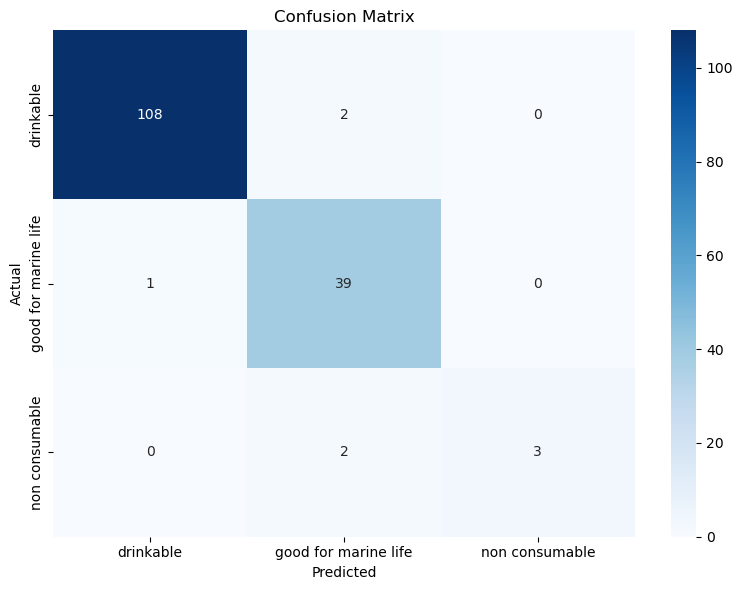

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Convert encoded labels back to original
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
print("Done")